/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


            new_cases  new_cases_smoothed
Date                                     
2020-07-01          0               0.429
2020-07-02          0               0.429
2020-07-03          0               0.286
2020-07-04          0               0.000
2020-07-05          0               0.000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-07-01 to 2021-05-31
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_cases           335 non-null    int64  
 1   new_cases_smoothed  335 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


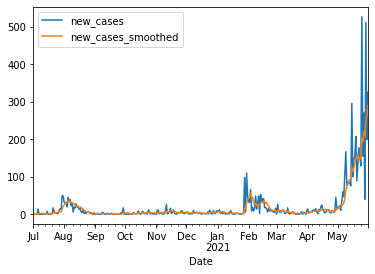

In [1]:
#read csv
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('202'+x, '%Y-%m-%d')
 
series = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Datasets%20for%20ARIMA%20(Only%20Date%20%2B%20Confirmed)/Vietnam%20(Date%20%2B%20New%20Cases%20%2B%20Smoothed%20New%20Cases).csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
print(series.info())
series.plot()
pyplot.show()

#we only use the raw data so we drop the smoothed data attribute out
series = series.drop(columns =['new_cases_smoothed'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Observations: 115
Training Observations: 60
Testing Observations: 55
Observations: 170
Training Observations: 115
Testing Observations: 55
Observations: 225
Training Observations: 170
Testing Observations: 55
Observations: 280
Training Observations: 225
Testing Observations: 55
Observations: 335
Training Observations: 280
Testing Observations: 55


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

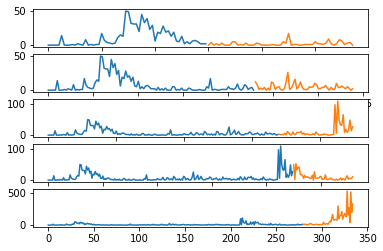

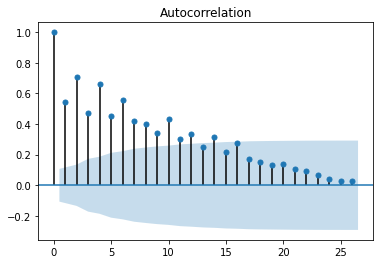

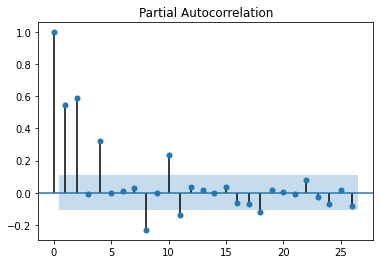

In [2]:
#Implementation of rolling-forward validation train-test split
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
X = series.values
splits = TimeSeriesSplit(n_splits=5)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(510 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

#Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
pyplot.show()
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
pyplot.show()

In [3]:
#split dataset into two subsets and calculate the mean
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
print('mean1=%f, mean2=%f' % (mean1, mean2))

mean1=6.250000, mean2=36.089820


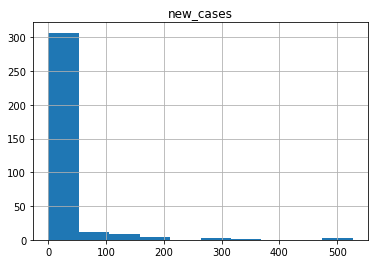

In [4]:
#check distribution of raw data set
series.hist()
pyplot.show()

In [5]:
#define function for ADF test (check stationarity)
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(series['new_cases'])

Results of Dickey-Fuller Test:
Test Statistic                   2.588768
p-value                          0.999073
#Lags Used                      17.000000
Number of Observations Used    317.000000
Critical Value (1%)             -3.451148
Critical Value (5%)             -2.870701
Critical Value (10%)            -2.571651
dtype: float64


[-0.20631231]


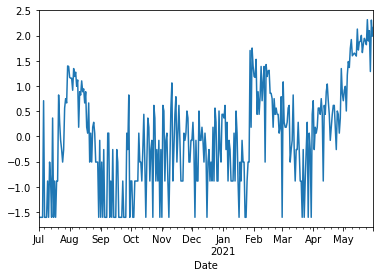

In [6]:
#Power transformation to achieve stationarity as far as possible
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
pt.fit(series)
print(pt.lambdas_)
series['y'] = pt.transform(series)
series['y'].plot()


In [7]:
#make sure to drop NaN or inf values
series = series.drop(columns = ['new_cases'])
series.dropna(inplace=True)
print(series.head())
print(series.info())

                   y
Date                
2020-07-01 -1.603412
2020-07-02 -1.603412
2020-07-03 -1.603412
2020-07-04 -1.603412
2020-07-05 -1.603412
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-07-01 to 2021-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       335 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB
None


In [8]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:60], X[60:115] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


ARIMA(0, 0, 0) RMSE=0.935
ARIMA(0, 0, 1) RMSE=0.872
ARIMA(0, 0, 2) RMSE=0.833
ARIMA(0, 0, 3) RMSE=0.874
ARIMA(0, 1, 0) RMSE=0.940
ARIMA(0, 1, 1) RMSE=0.768
ARIMA(0, 1, 2) RMSE=0.775
ARIMA(0, 2, 0) RMSE=1.586
ARIMA(0, 2, 1) RMSE=0.953
ARIMA(1, 0, 0) RMSE=0.832
ARIMA(1, 0, 1) RMSE=0.756
ARIMA(1, 0, 2) RMSE=0.764
ARIMA(1, 1, 0) RMSE=0.840
ARIMA(1, 1, 1) RMSE=0.780
ARIMA(1, 1, 3) RMSE=0.767
ARIMA(1, 2, 0) RMSE=1.171
ARIMA(1, 2, 1) RMSE=0.859
ARIMA(2, 0, 0) RMSE=0.799
ARIMA(2, 0, 1) RMSE=0.777
ARIMA(2, 1, 0) RMSE=0.834
ARIMA(2, 1, 1) RMSE=0.782
ARIMA(2, 2, 0) RMSE=1.143
ARIMA(2, 2, 1) RMSE=0.855
Best ARIMA(1, 0, 1) RMSE=0.756


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(1, 1)   Log Likelihood                -334.218
Method:                       css-mle   S.D. of innovations              0.655
Date:                Sat, 17 Jul 2021   AIC                            676.437
Time:                        03:50:22   BIC                            691.693
Sample:                    07-01-2020   HQIC                           682.519
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0614      0.479      0.128      0.898      -0.878       1.001
ar.L1.y        0.9802      0.014     70.440      0.000       0.953       1.008
ma.L1.y       -0.7010      0.041    -17.153      0.0

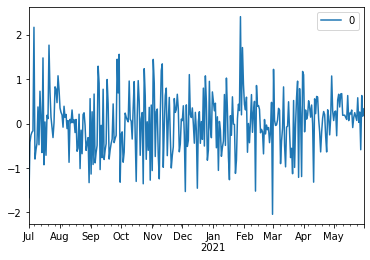

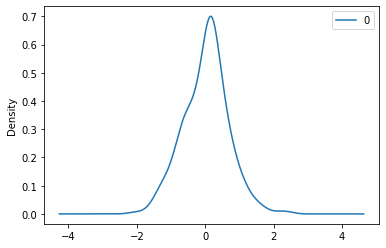

                0
count  335.000000
mean     0.022839
std      0.659696
min     -2.041261
25%     -0.428073
50%      0.088203
75%      0.391572
max      2.409202
predicted=-0.387215, expected=-1.603412
predicted=-0.868681, expected=-0.076751
predicted=-0.545567, expected=-1.603412
predicted=-0.934116, expected=-0.507606
predicted=-0.762729, expected=-1.603412
predicted=-1.063216, expected=-0.259390
predicted=-0.757046, expected=-1.603412
predicted=-1.048712, expected=-1.603412
predicted=-1.236482, expected=-1.603412
predicted=-1.356190, expected=0.066358
predicted=-0.831572, expected=0.066358
predicted=-0.491876, expected=-1.603412
predicted=-0.885733, expected=-0.883432
predicted=-0.875514, expected=-1.603412
predicted=-1.109919, expected=-0.259390
predicted=-0.813286, expected=-1.603412
predicted=-1.063360, expected=-1.603412
predicted=-1.228425, expected=-1.603412
predicted=-1.338779, expected=-0.259390
predicted=-0.967221, expected=-0.507606
predicted=-0.806152, expected=-1.603412


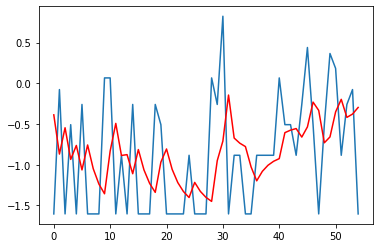

In [13]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(1,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (60 training observations and 55 testing observations)
train, test = X[:60], X[60:115] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [9]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:115], X[115:170] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=0.674
ARIMA(0, 0, 1) RMSE=0.694
ARIMA(0, 0, 2) RMSE=0.765
ARIMA(0, 0, 3) RMSE=0.763
ARIMA(0, 1, 0) RMSE=0.928
ARIMA(0, 1, 1) RMSE=0.724
ARIMA(0, 1, 2) RMSE=0.727
ARIMA(0, 2, 0) RMSE=1.577
ARIMA(0, 2, 1) RMSE=0.937
ARIMA(1, 0, 0) RMSE=0.756
ARIMA(1, 0, 1) RMSE=0.715
ARIMA(1, 0, 2) RMSE=0.719
ARIMA(1, 1, 0) RMSE=0.846
ARIMA(1, 1, 1) RMSE=0.728
ARIMA(1, 1, 2) RMSE=0.735
ARIMA(1, 1, 3) RMSE=0.749
ARIMA(1, 2, 0) RMSE=1.279
ARIMA(2, 0, 0) RMSE=0.771
ARIMA(2, 0, 1) RMSE=0.719
ARIMA(2, 1, 0) RMSE=0.797
ARIMA(2, 1, 1) RMSE=0.731
ARIMA(2, 1, 2) RMSE=0.741
ARIMA(2, 1, 3) RMSE=0.772
ARIMA(2, 2, 0) RMSE=1.119
Best ARIMA(0, 0, 0) RMSE=0.674


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(1, 1)   Log Likelihood                -334.218
Method:                       css-mle   S.D. of innovations              0.655
Date:                Sat, 17 Jul 2021   AIC                            676.437
Time:                        03:50:38   BIC                            691.693
Sample:                    07-01-2020   HQIC                           682.519
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0614      0.479      0.128      0.898      -0.878       1.001
ar.L1.y        0.9802      0.014     70.440      0.000       0.953       1.008
ma.L1.y       -0.7010      0.041    -17.153      0.0

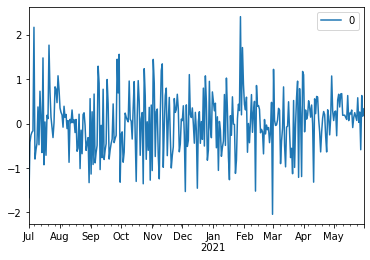

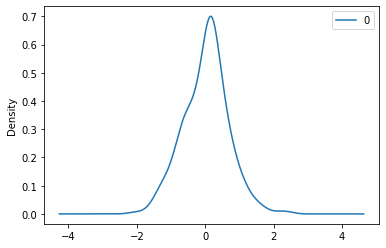

                0
count  335.000000
mean     0.022839
std      0.659696
min     -2.041261
25%     -0.428073
50%      0.088203
75%      0.391572
max      2.409202
predicted=-0.689141, expected=0.616840
predicted=-0.311739, expected=0.365964
predicted=-0.127821, expected=-0.883432
predicted=-0.357893, expected=-0.259390
predicted=-0.338405, expected=-0.883432
predicted=-0.498584, expected=-0.076751
predicted=-0.384578, expected=-1.603412
predicted=-0.727982, expected=-0.259390
predicted=-0.592990, expected=-1.603412
predicted=-0.870931, expected=0.616840
predicted=-0.460280, expected=0.505225
predicted=-0.205682, expected=-0.883432
predicted=-0.400840, expected=-0.076751
predicted=-0.322273, expected=0.066358
predicted=-0.228674, expected=-0.883432
predicted=-0.412136, expected=-1.603412
predicted=-0.728962, expected=-0.507606
predicted=-0.665032, expected=0.563840
predicted=-0.347103, expected=1.062369
predicted=0.014818, expected=-0.883432
predicted=-0.243576, expected=-0.259390
predic

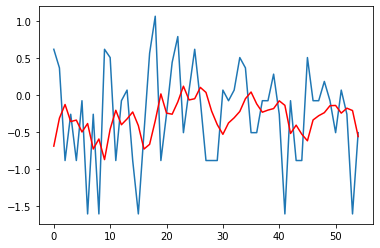

In [14]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(1,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (115 training observations and 55 testing observations)
train, test = X[:115], X[115:170] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [10]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:170], X[170:225] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.910
ARIMA(0, 0, 1) RMSE=0.814
ARIMA(0, 0, 2) RMSE=0.756
ARIMA(0, 0, 3) RMSE=0.731
ARIMA(0, 1, 0) RMSE=0.807
ARIMA(0, 1, 1) RMSE=0.700
ARIMA(0, 1, 2) RMSE=0.701
ARIMA(0, 2, 0) RMSE=1.408
ARIMA(0, 2, 1) RMSE=0.811
ARIMA(1, 0, 0) RMSE=0.735
ARIMA(1, 0, 1) RMSE=0.700
ARIMA(1, 0, 2) RMSE=0.701
ARIMA(1, 0, 3) RMSE=0.704
ARIMA(1, 1, 0) RMSE=0.699
ARIMA(1, 1, 1) RMSE=0.700
ARIMA(1, 1, 2) RMSE=0.700
ARIMA(1, 1, 3) RMSE=0.697
ARIMA(1, 2, 0) RMSE=0.995
ARIMA(2, 0, 0) RMSE=0.682
ARIMA(2, 0, 1) RMSE=0.701
ARIMA(2, 0, 2) RMSE=0.699
ARIMA(2, 0, 3) RMSE=0.699
ARIMA(2, 1, 0) RMSE=0.691
ARIMA(2, 1, 1) RMSE=0.703
ARIMA(2, 1, 2) RMSE=0.697
ARIMA(2, 1, 3) RMSE=0.732
ARIMA(2, 2, 0) RMSE=0.875
Best ARIMA(2, 0, 0) RMSE=0.682


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(1, 1)   Log Likelihood                -334.218
Method:                       css-mle   S.D. of innovations              0.655
Date:                Sat, 17 Jul 2021   AIC                            676.437
Time:                        03:50:53   BIC                            691.693
Sample:                    07-01-2020   HQIC                           682.519
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0614      0.479      0.128      0.898      -0.878       1.001
ar.L1.y        0.9802      0.014     70.440      0.000       0.953       1.008
ma.L1.y       -0.7010      0.041    -17.153      0.0

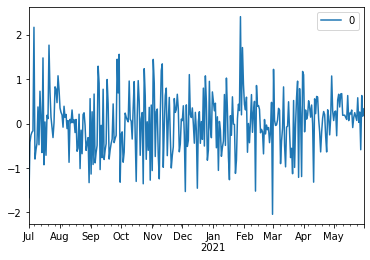

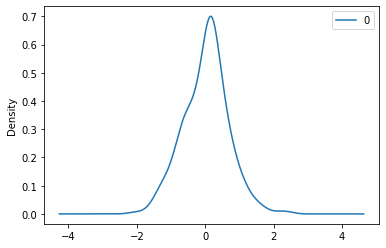

                0
count  335.000000
mean     0.022839
std      0.659696
min     -2.041261
25%     -0.428073
50%      0.088203
75%      0.391572
max      2.409202
predicted=-0.544537, expected=-0.259390
predicted=-0.472780, expected=-0.883432
predicted=-0.573353, expected=-0.507606
predicted=-0.554274, expected=-0.883432
predicted=-0.632175, expected=0.183225
predicted=-0.429501, expected=-0.883432
predicted=-0.541183, expected=0.563840
predicted=-0.274925, expected=0.281499
predicted=-0.147061, expected=-0.883432
predicted=-0.338729, expected=-0.883432
predicted=-0.473607, expected=0.505225
predicted=-0.243457, expected=-0.259390
predicted=-0.256513, expected=-0.507606
predicted=-0.324304, expected=0.439801
predicted=-0.151042, expected=0.439801
predicted=-0.022685, expected=0.365964
predicted=0.054231, expected=0.616840
predicted=0.172498, expected=-0.259390
predicted=0.041988, expected=0.281499
predicted=0.080464, expected=-0.883432
predicted=-0.171861, expected=-0.076751
predicted=-

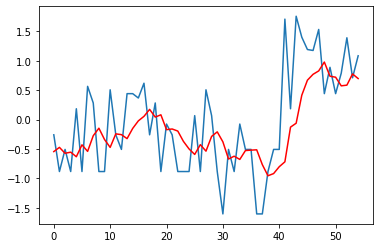

In [15]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(1,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (170 training observations and 55 testing observations)
train, test = X[0:170], X[170:225] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [11]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:225], X[225:280] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.857
ARIMA(0, 0, 1) RMSE=0.810
ARIMA(0, 0, 2) RMSE=0.802
ARIMA(0, 0, 3) RMSE=0.755
ARIMA(0, 1, 0) RMSE=0.926
ARIMA(0, 1, 1) RMSE=0.686
ARIMA(0, 1, 2) RMSE=0.686
ARIMA(0, 2, 0) RMSE=1.631
ARIMA(0, 2, 1) RMSE=0.929
ARIMA(1, 0, 0) RMSE=0.784
ARIMA(1, 0, 1) RMSE=0.674
ARIMA(1, 0, 2) RMSE=0.672
ARIMA(1, 0, 3) RMSE=0.673
ARIMA(1, 1, 0) RMSE=0.777
ARIMA(1, 1, 1) RMSE=0.687
ARIMA(1, 1, 2) RMSE=0.687
ARIMA(1, 1, 3) RMSE=0.697
ARIMA(1, 2, 0) RMSE=1.214
ARIMA(2, 0, 0) RMSE=0.728
ARIMA(2, 0, 1) RMSE=0.673
ARIMA(2, 0, 2) RMSE=0.676
ARIMA(2, 0, 3) RMSE=0.682
ARIMA(2, 1, 0) RMSE=0.708
ARIMA(2, 1, 1) RMSE=0.689
ARIMA(2, 1, 2) RMSE=0.695
ARIMA(2, 1, 3) RMSE=0.725
ARIMA(2, 2, 0) RMSE=0.976
Best ARIMA(1, 0, 2) RMSE=0.672


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(1, 1)   Log Likelihood                -334.218
Method:                       css-mle   S.D. of innovations              0.655
Date:                Sat, 17 Jul 2021   AIC                            676.437
Time:                        03:51:08   BIC                            691.693
Sample:                    07-01-2020   HQIC                           682.519
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0614      0.479      0.128      0.898      -0.878       1.001
ar.L1.y        0.9802      0.014     70.440      0.000       0.953       1.008
ma.L1.y       -0.7010      0.041    -17.153      0.0

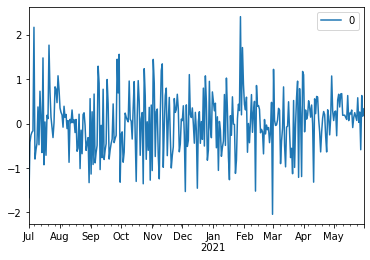

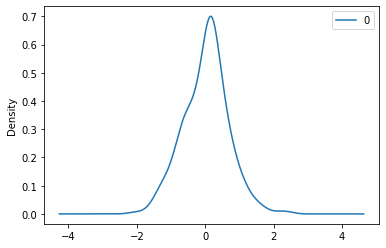

                0
count  335.000000
mean     0.022839
std      0.659696
min     -2.041261
25%     -0.428073
50%      0.088203
75%      0.391572
max      2.409202
predicted=0.758578, expected=1.389159
predicted=0.894382, expected=-0.507606
predicted=0.415016, expected=1.427133
predicted=0.675073, expected=1.189513
predicted=0.776768, expected=1.300866
predicted=0.880026, expected=1.312968
predicted=0.955889, expected=0.856539
predicted=0.873585, expected=0.856539
predicted=0.818745, expected=0.750314
predicted=0.751058, expected=0.183225
predicted=0.538191, expected=0.750314
predicted=0.562769, expected=0.439801
predicted=0.488664, expected=0.563840
predicted=0.475262, expected=0.439801
predicted=0.430684, expected=0.439801
predicted=0.400936, expected=0.066358
predicted=0.273739, expected=0.183225
predicted=0.221699, expected=0.788219
predicted=0.359405, expected=-1.603412
predicted=-0.223697, expected=1.082831
predicted=0.139830, expected=0.281499
predicted=0.158616, expected=0.183225

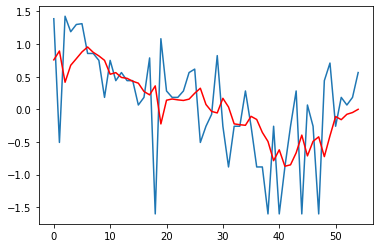

In [16]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(1,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (225 training observations and 55 testing observations)
train, test = X[:225], X[225:280] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [12]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:280], X[280:] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.453
ARIMA(0, 0, 1) RMSE=1.087
ARIMA(0, 0, 2) RMSE=0.916
ARIMA(0, 0, 3) RMSE=0.833
ARIMA(0, 1, 0) RMSE=0.460
ARIMA(0, 1, 1) RMSE=0.397
ARIMA(0, 1, 2) RMSE=0.398
ARIMA(0, 2, 0) RMSE=0.771
ARIMA(0, 2, 1) RMSE=0.462
ARIMA(1, 0, 0) RMSE=0.699
ARIMA(1, 0, 1) RMSE=0.454
ARIMA(1, 0, 2) RMSE=0.455
ARIMA(1, 0, 3) RMSE=0.456
ARIMA(1, 1, 0) RMSE=0.425
ARIMA(1, 1, 1) RMSE=0.398
ARIMA(1, 1, 2) RMSE=0.398
ARIMA(1, 1, 3) RMSE=0.398
ARIMA(1, 2, 0) RMSE=0.608
ARIMA(2, 0, 0) RMSE=0.553
ARIMA(2, 0, 1) RMSE=0.455
ARIMA(2, 0, 2) RMSE=0.463
ARIMA(2, 0, 3) RMSE=0.465
ARIMA(2, 1, 0) RMSE=0.412
ARIMA(2, 1, 1) RMSE=0.398
ARIMA(2, 1, 2) RMSE=0.398
ARIMA(2, 1, 3) RMSE=0.385
ARIMA(2, 2, 0) RMSE=0.537
Best ARIMA(2, 1, 3) RMSE=0.385


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(1, 1)   Log Likelihood                -334.218
Method:                       css-mle   S.D. of innovations              0.655
Date:                Sat, 17 Jul 2021   AIC                            676.437
Time:                        03:51:20   BIC                            691.693
Sample:                    07-01-2020   HQIC                           682.519
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0614      0.479      0.128      0.898      -0.878       1.001
ar.L1.y        0.9802      0.014     70.440      0.000       0.953       1.008
ma.L1.y       -0.7010      0.041    -17.153      0.0

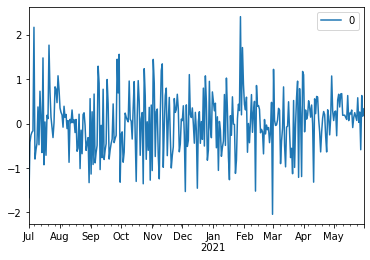

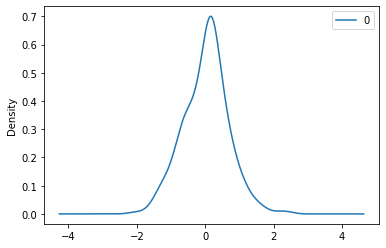

                0
count  335.000000
mean     0.022839
std      0.659696
min     -2.041261
25%     -0.428073
50%      0.088203
75%      0.391572
max      2.409202
predicted=0.134753, expected=0.563840
predicted=0.229021, expected=0.439801
predicted=0.261360, expected=0.750314
predicted=0.367182, expected=0.439801
predicted=0.356928, expected=-0.883432
predicted=-0.002068, expected=0.616840
predicted=0.148275, expected=0.439801
predicted=0.205039, expected=0.887522
predicted=0.362660, expected=1.040971
predicted=0.514948, expected=0.709438
predicted=0.532660, expected=0.439801
predicted=0.472450, expected=-0.076751
predicted=0.292934, expected=0.183225
predicted=0.238411, expected=0.439801
predicted=0.269339, expected=0.616840
predicted=0.337835, expected=0.616840
predicted=0.385561, expected=0.183225
predicted=0.303560, expected=-0.259390
predicted=0.129216, expected=0.505225
predicted=0.211672, expected=0.439801
predicted=0.251240, expected=0.066358
predicted=0.180273, expected=0.36596

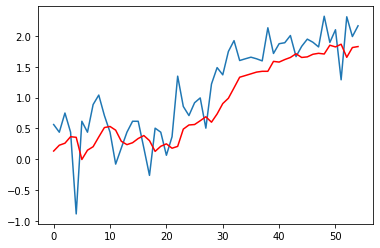

In [17]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
# fit model
series = series.astype('float64')
model = ARIMA(series, order=(1,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (280 training observations and 55 testing observations)
train, test = X[:280], X[280:] 
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


                   y
2020-07-01 -1.603412
2020-07-02 -1.603412
2020-07-03 -1.603412
2020-07-04 -1.603412
2020-07-05 -1.603412
...              ...
2021-05-27  2.098822
2021-05-28  1.288411
2021-05-29  2.308657
2021-05-30  1.988795
2021-05-31  2.162446

[335 rows x 1 columns]


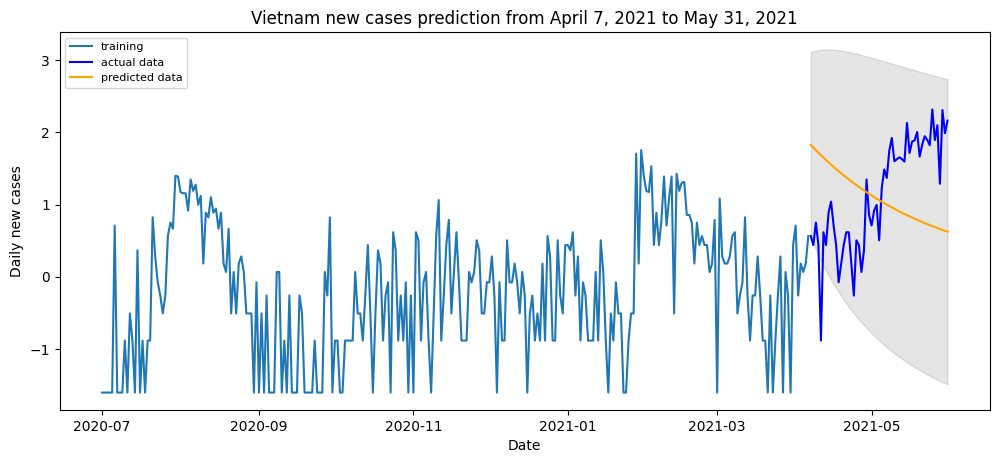

In [19]:
import pandas as pd
from statsmodels.tsa.stattools import acf 
import matplotlib.pyplot as plt
from scipy.special import inv_boxcox

print(series)
train1 = series.iloc[0:280]
idx1 = pd.date_range("2020-07-01", periods=280)
train1.index = idx1

test1 = series.iloc[280:]
idx2 = pd.date_range("2021-04-07", periods=55)
test1.index = idx2


# Forecast
fc, se, conf = model_fit.forecast(55, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test1.index)
lower_series = pd.Series(conf[:, 0], index=test1.index)
upper_series = pd.Series(conf[:, 1], index=test1.index)
fig = plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, color = 'blue', label='actual data')
plt.plot(fc_series, color = 'orange',label='predicted data')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Vietnam new cases prediction from April 7, 2021 to May 31, 2021')
plt.xlabel('Date')
plt.ylabel('Daily new cases')
plt.legend(loc='upper left', fontsize=8)
plt.show()
